In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dog import *
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
savefig = False
random.seed(np.exp(1))

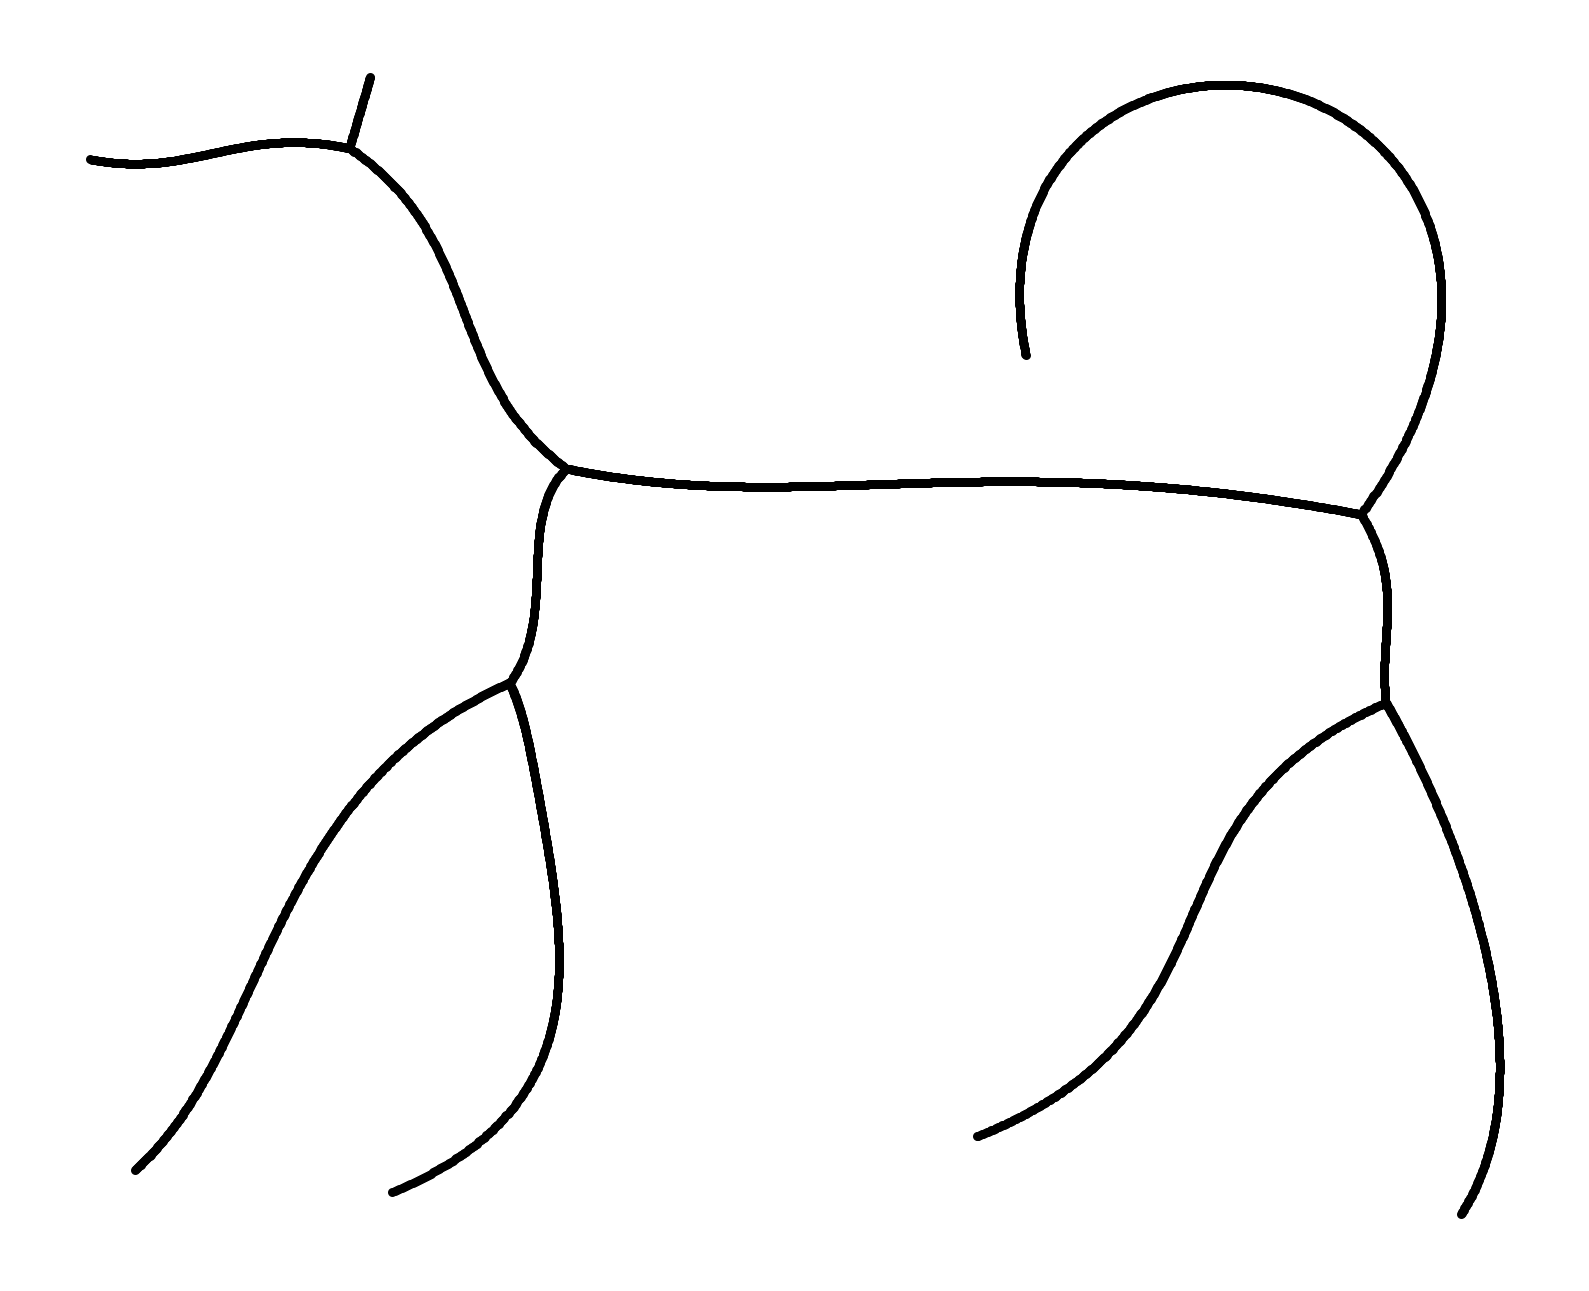

In [3]:
plane = Plane()
plane.plot(get_points())
plane.show()

Found a dense sample


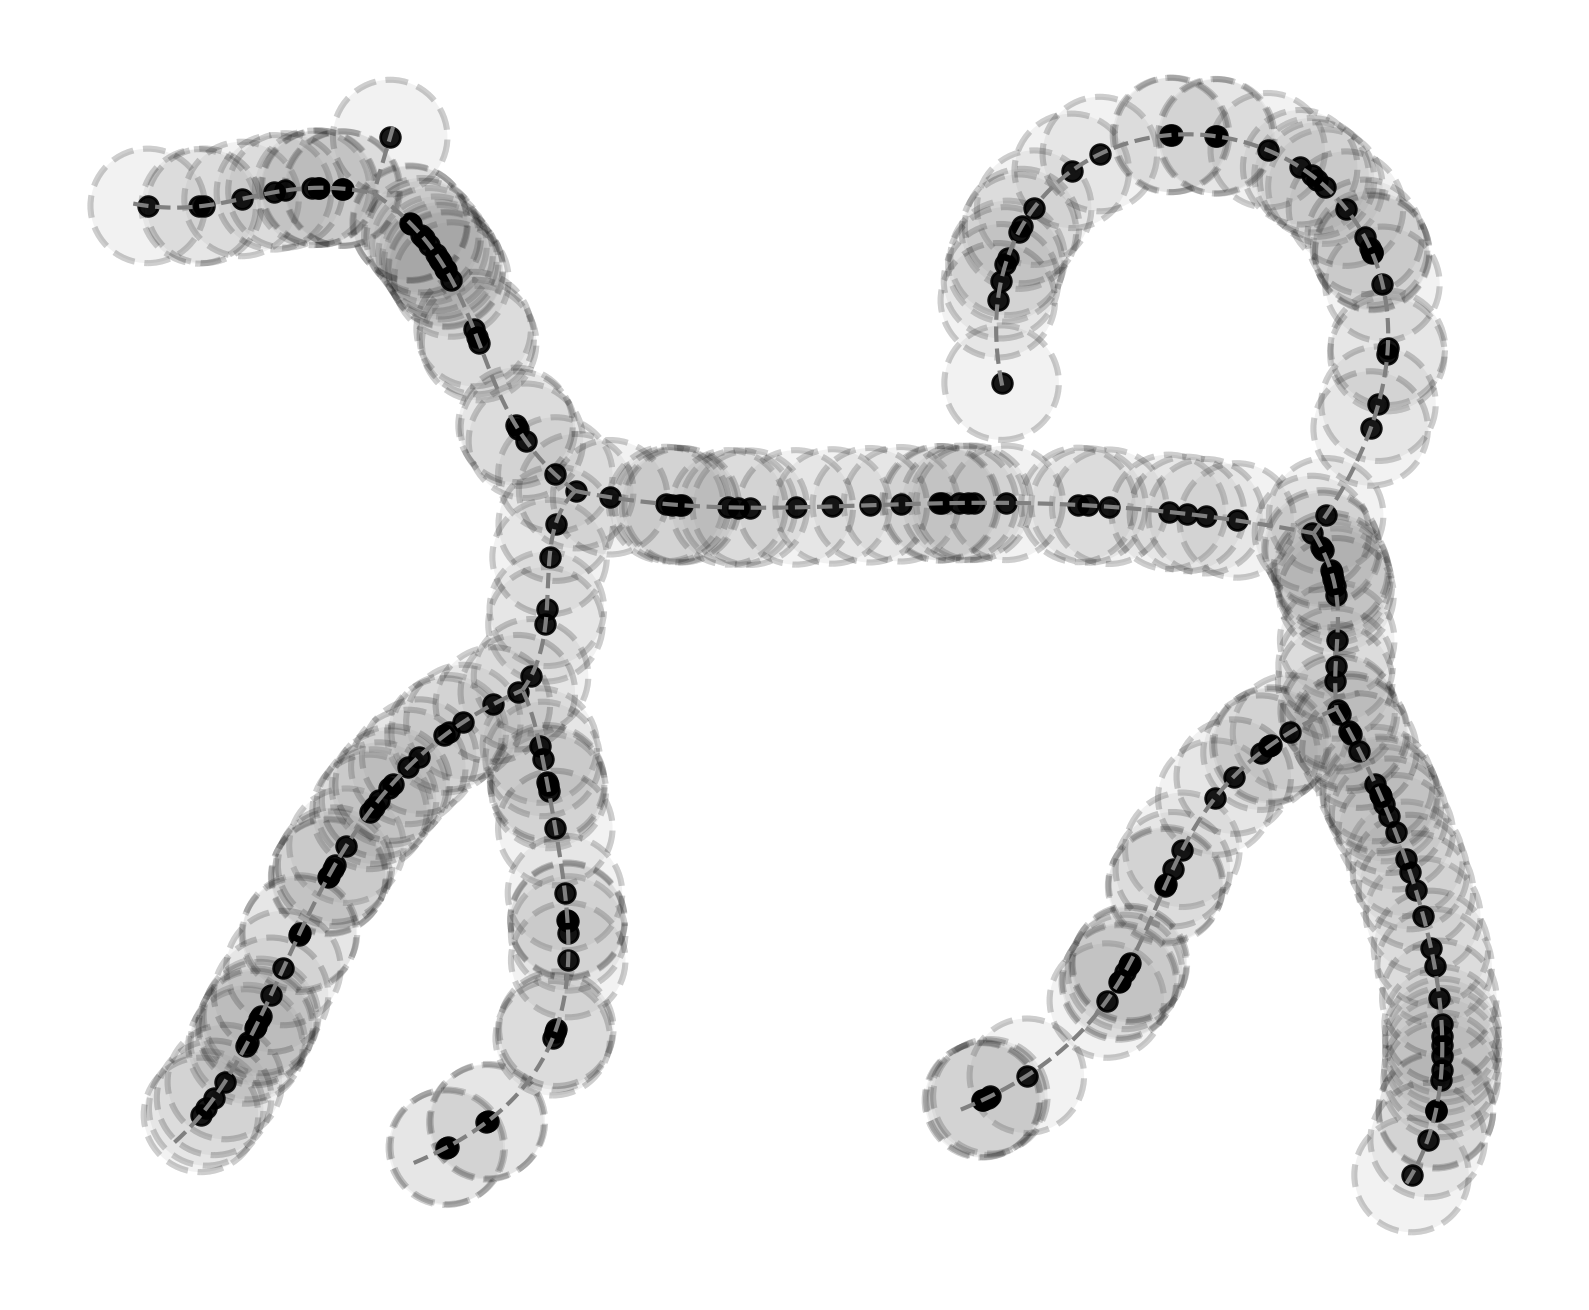

In [4]:
delta = 1
for i in range(50):
    sample_points = get_sample_points(200)
    if is_dense(sample_points, delta):
        print('Found a dense sample')
        plane = Plane()
        plane.plot_sample(sample_points, delta)
        plane.show()        
        break

In [5]:
save_sample(sample_points, 'dog_dense_sample_200_points')

## Reconstruction

In [6]:
sample_points = load_sample('dog_dense_sample_200_points')

In [7]:
from metric_graph_reconstruction import *

In [8]:
dog_points = []
for sample_point in sample_points:
    dog_points.append(Point(sample_point[0], sample_point[1]))
    
point_cloud = PointCloud(dog_points)    

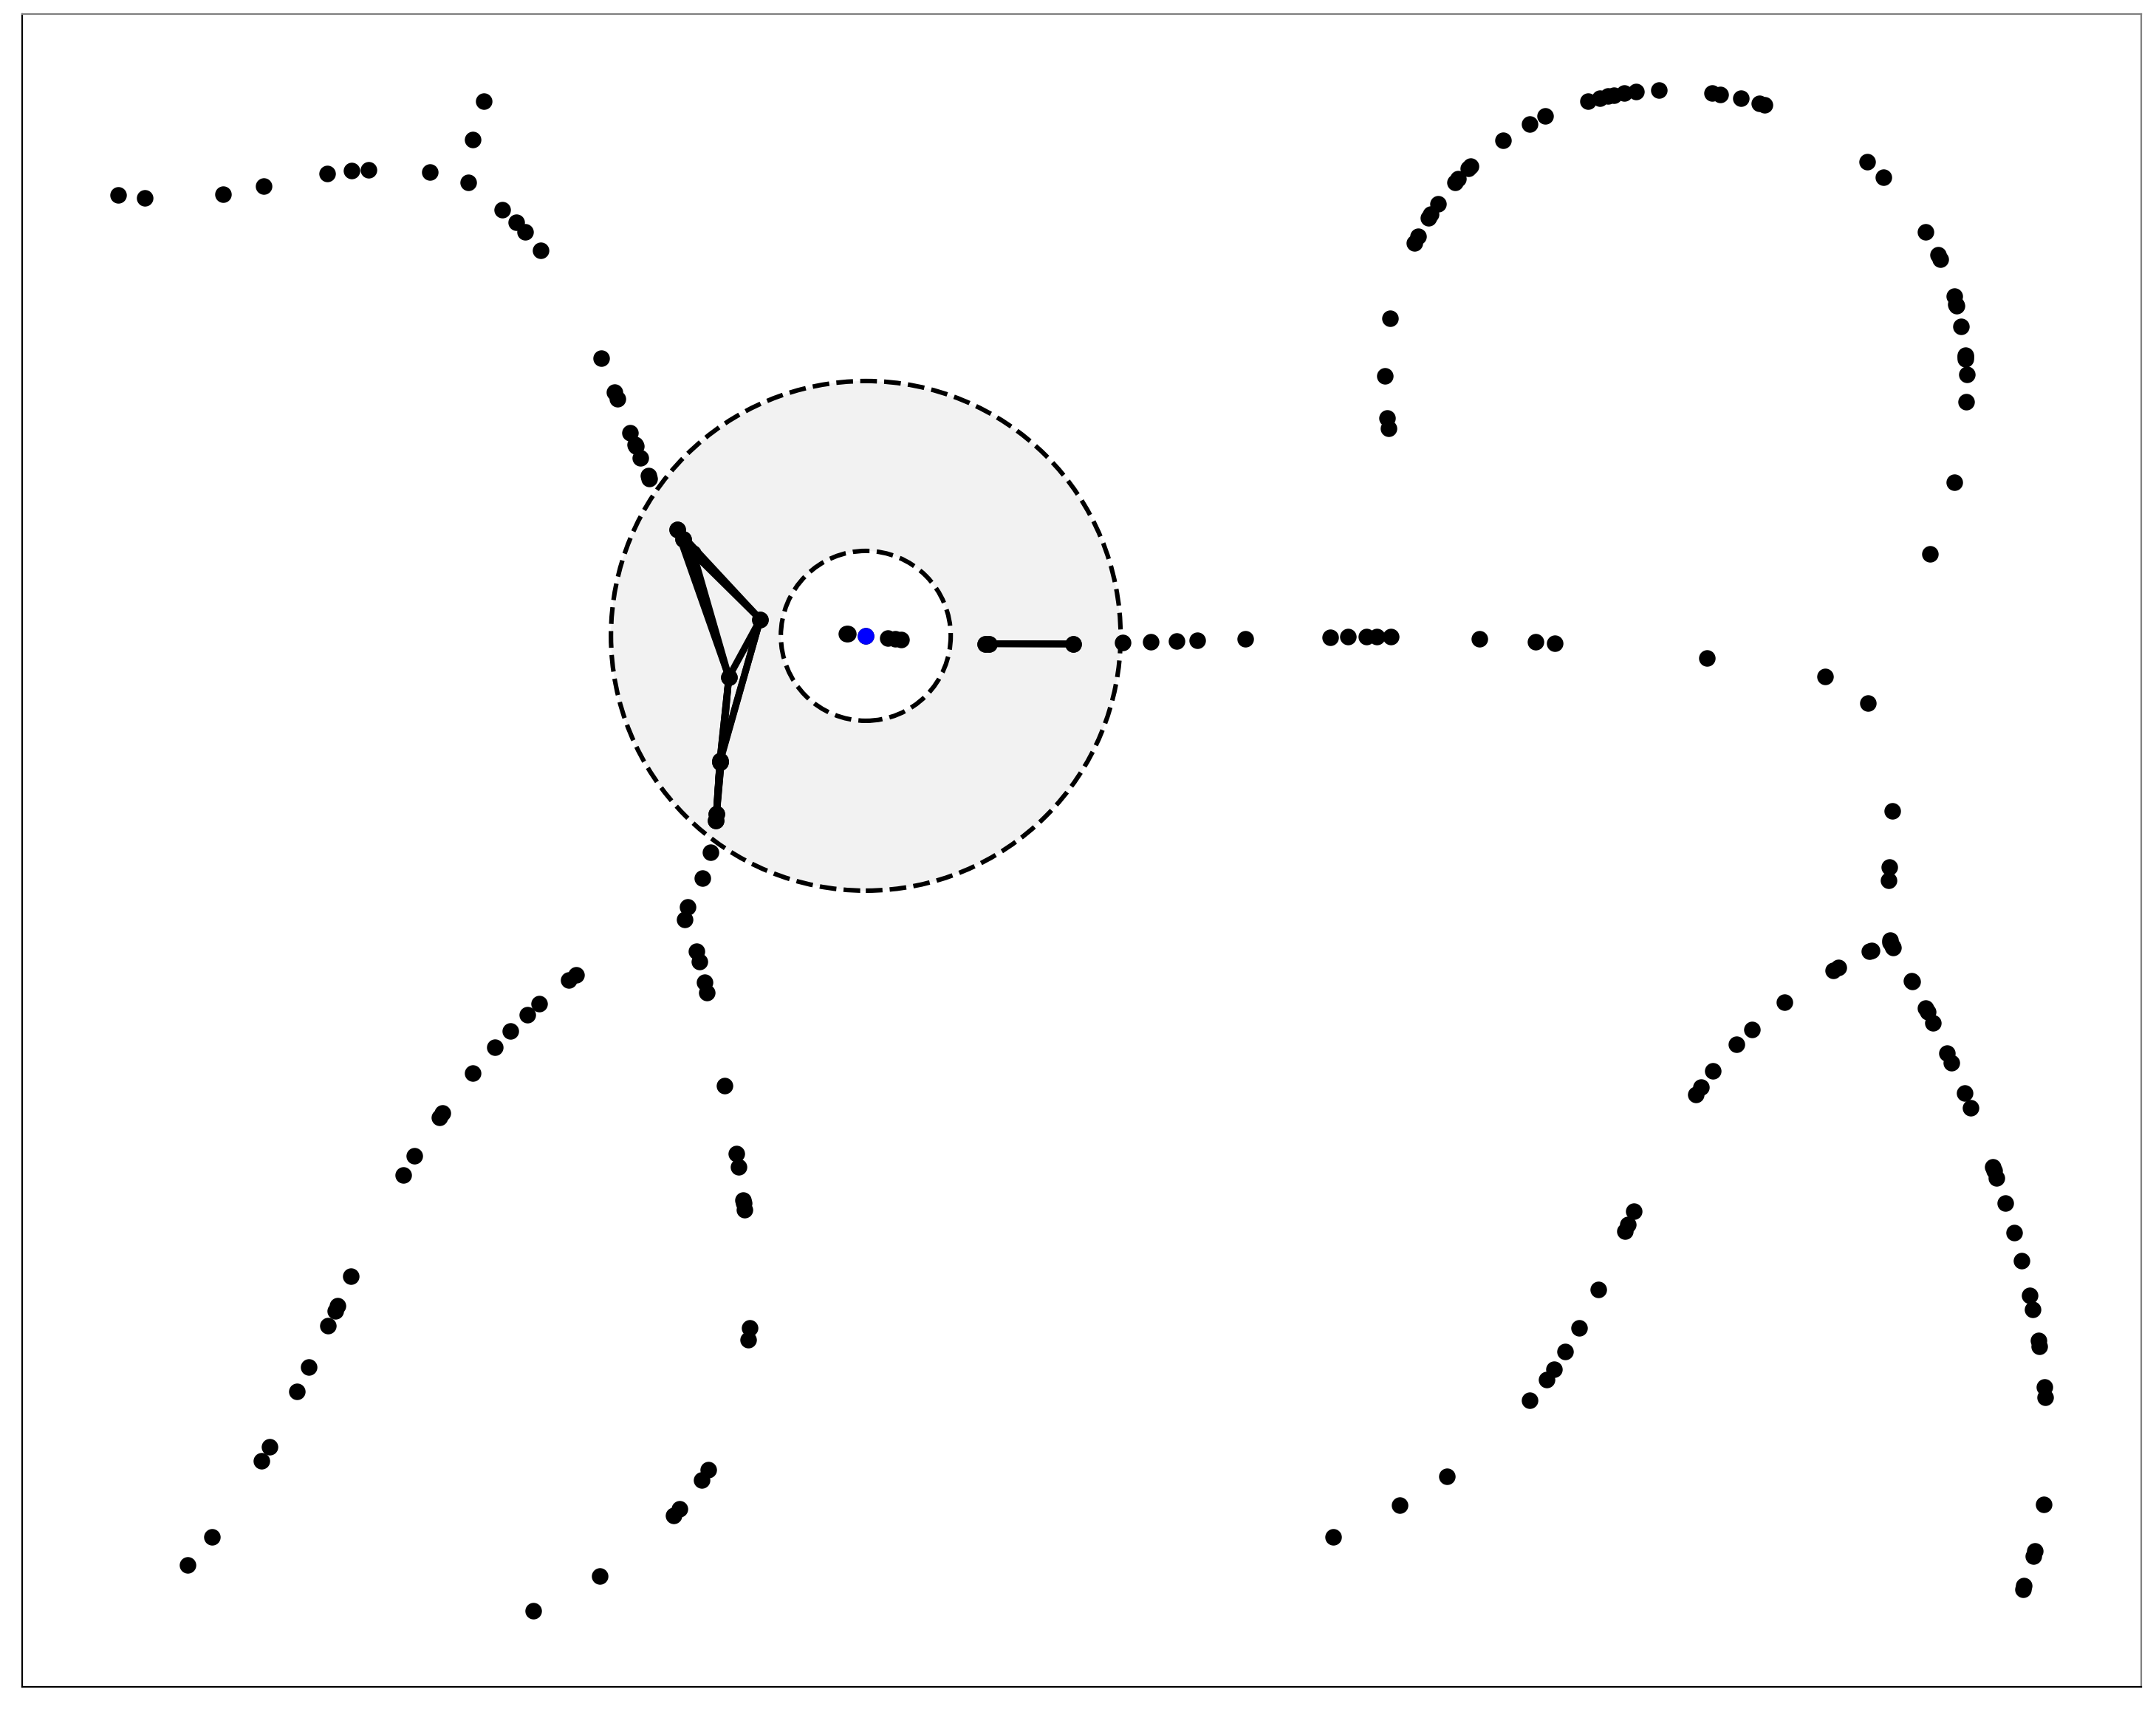

In [9]:
space = Space(2)

r = 0.5
delta = 1

space.plot_points(point_cloud.points)

# plot shell S_y 
y = point_cloud.points[13]
space.plot_shell(y, r, delta, point_cloud.points)

# plot Rips_delta(S_y)
shell_points = get_shell_points(point_cloud.points, y, r, delta)
rips_embedded = rips_vietoris_graph(delta, shell_points)
space.plot_embedded_graph(rips_embedded)

# number of connected components of Rips_delta(S_y) is 3
space.plot_point(y, color='blue')

space.show()

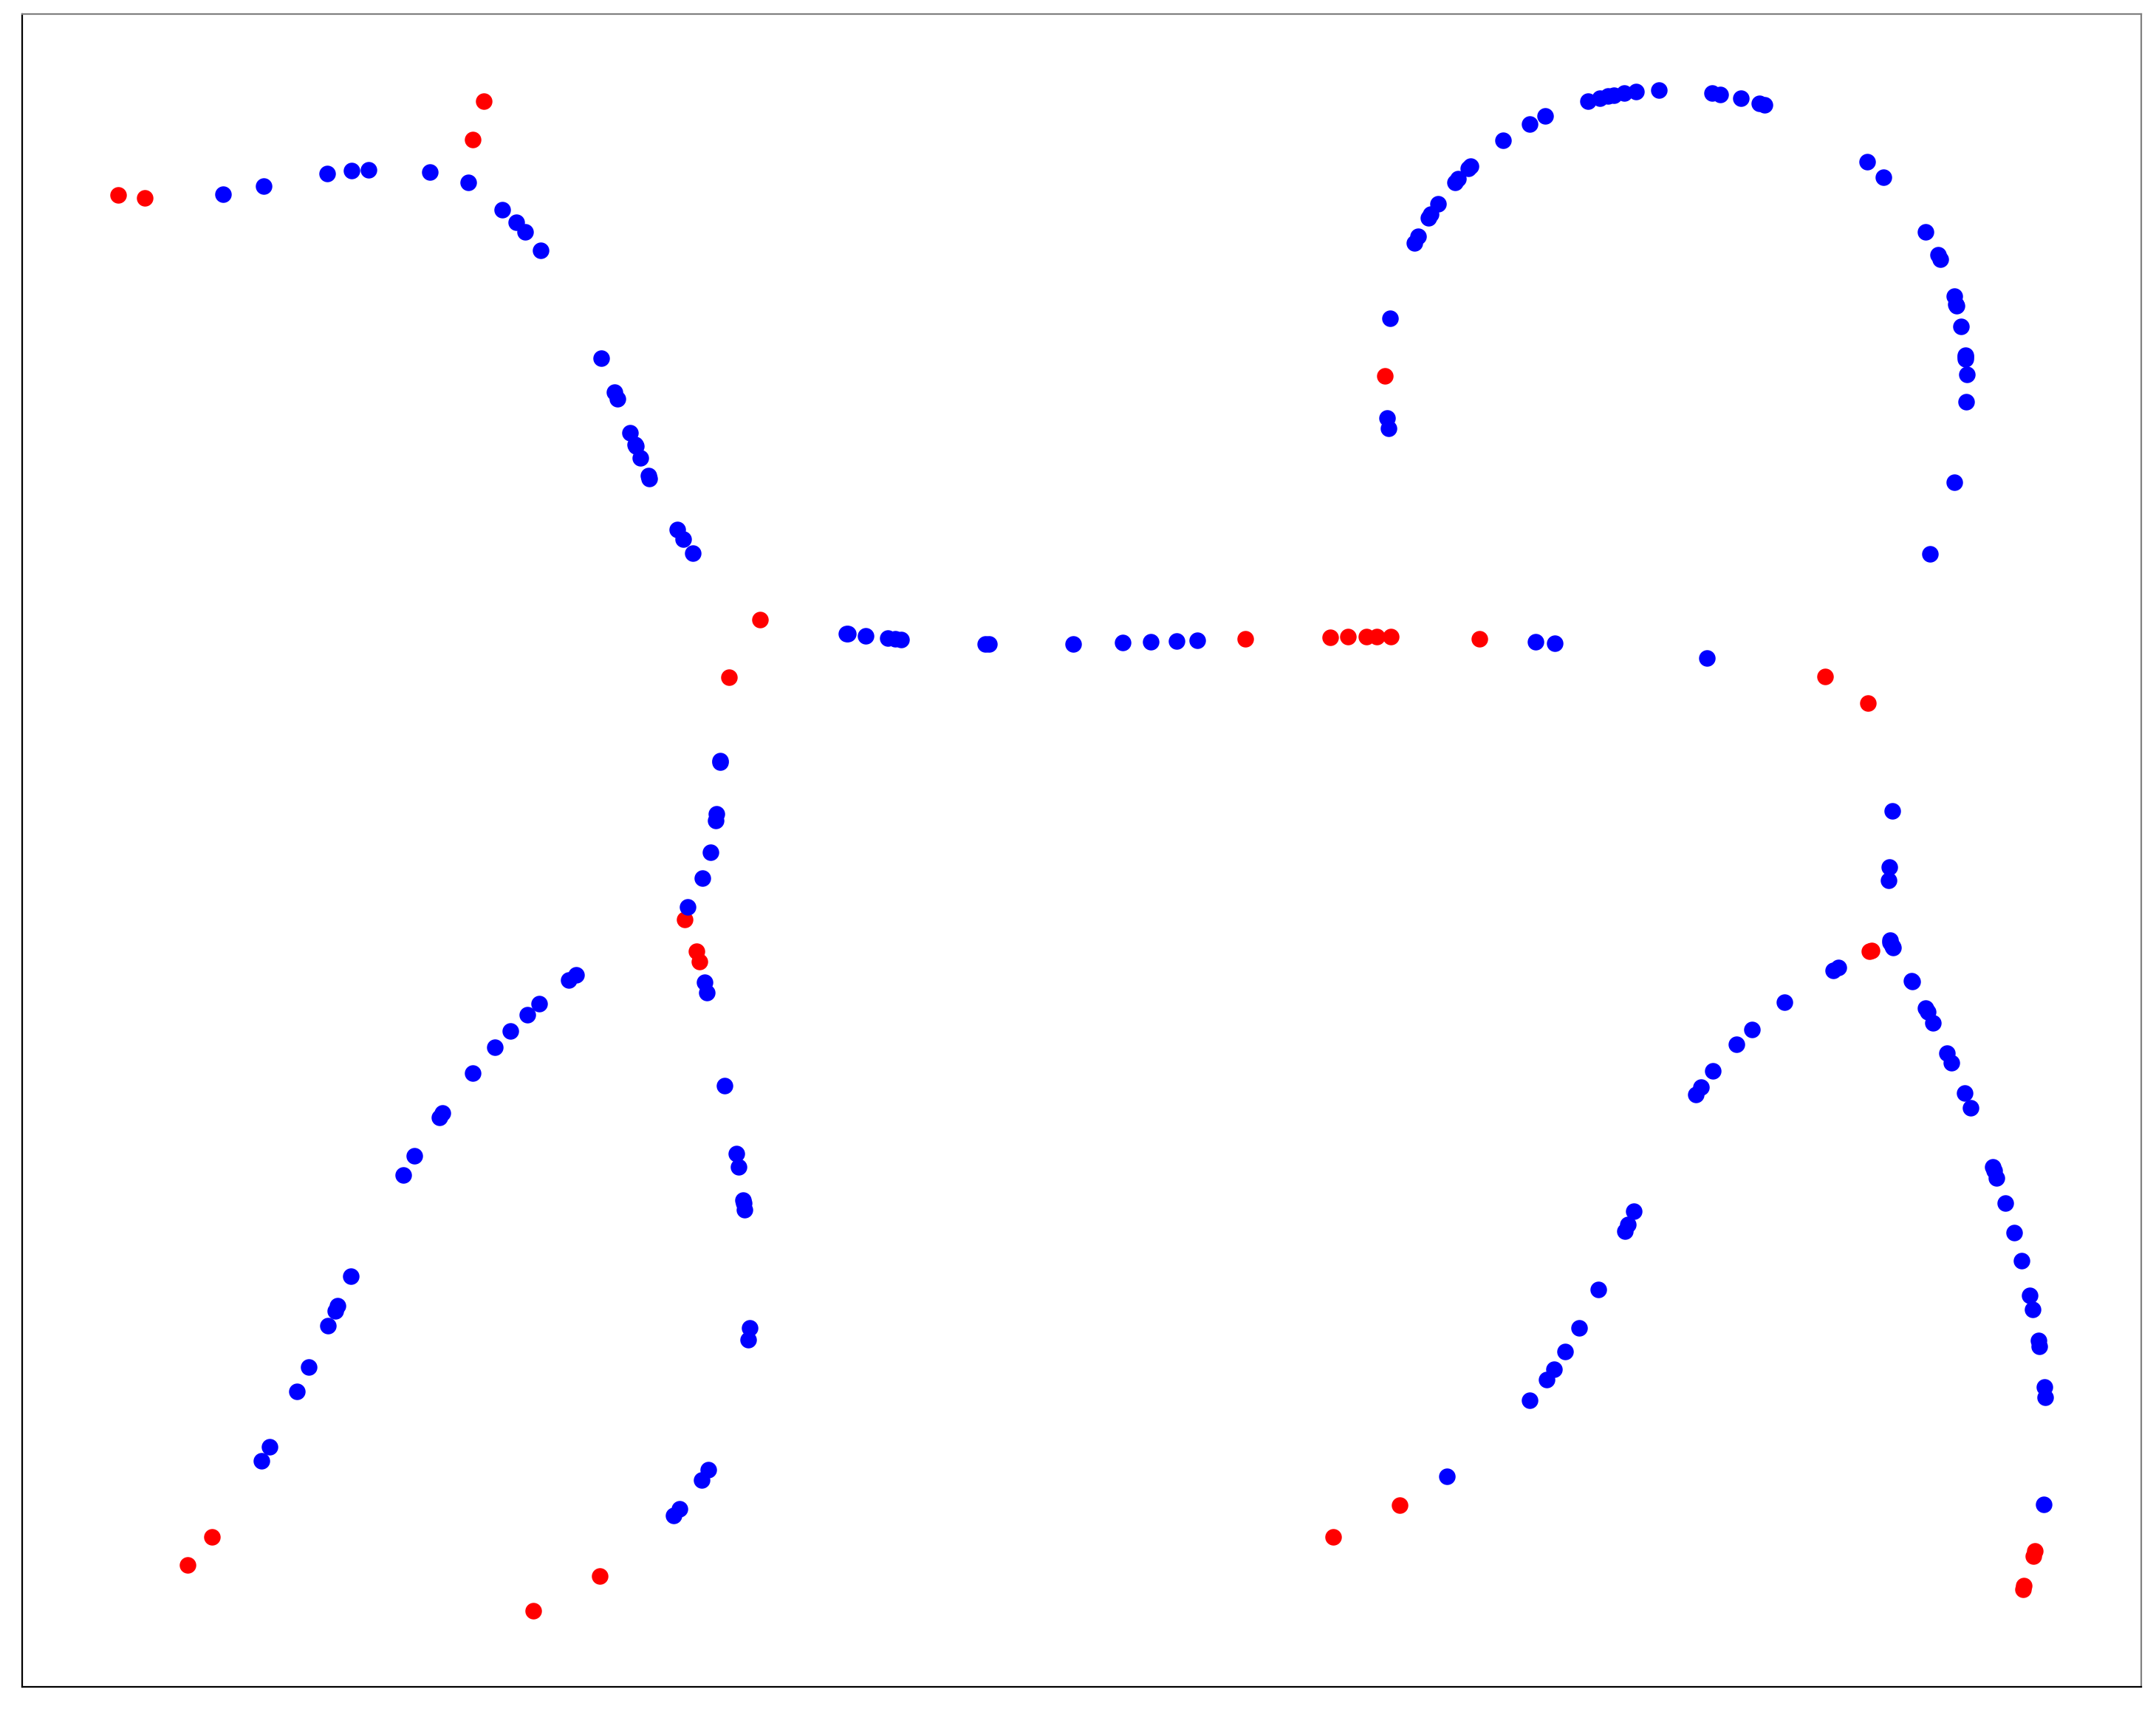

In [10]:
show = True
## label the points as edge or vertex points
for y in point_cloud.points:
    shell_points = get_shell_points(point_cloud.points, y, r, delta)
    rips_embedded = rips_vietoris_graph(delta, shell_points)

    if rips_embedded.k == 2:
        y.label = 'E'
    else:
        y.label = 'V'
if show:
    # after labeling step
    space = Space(2)
    space.plot_points(point_cloud.points) 

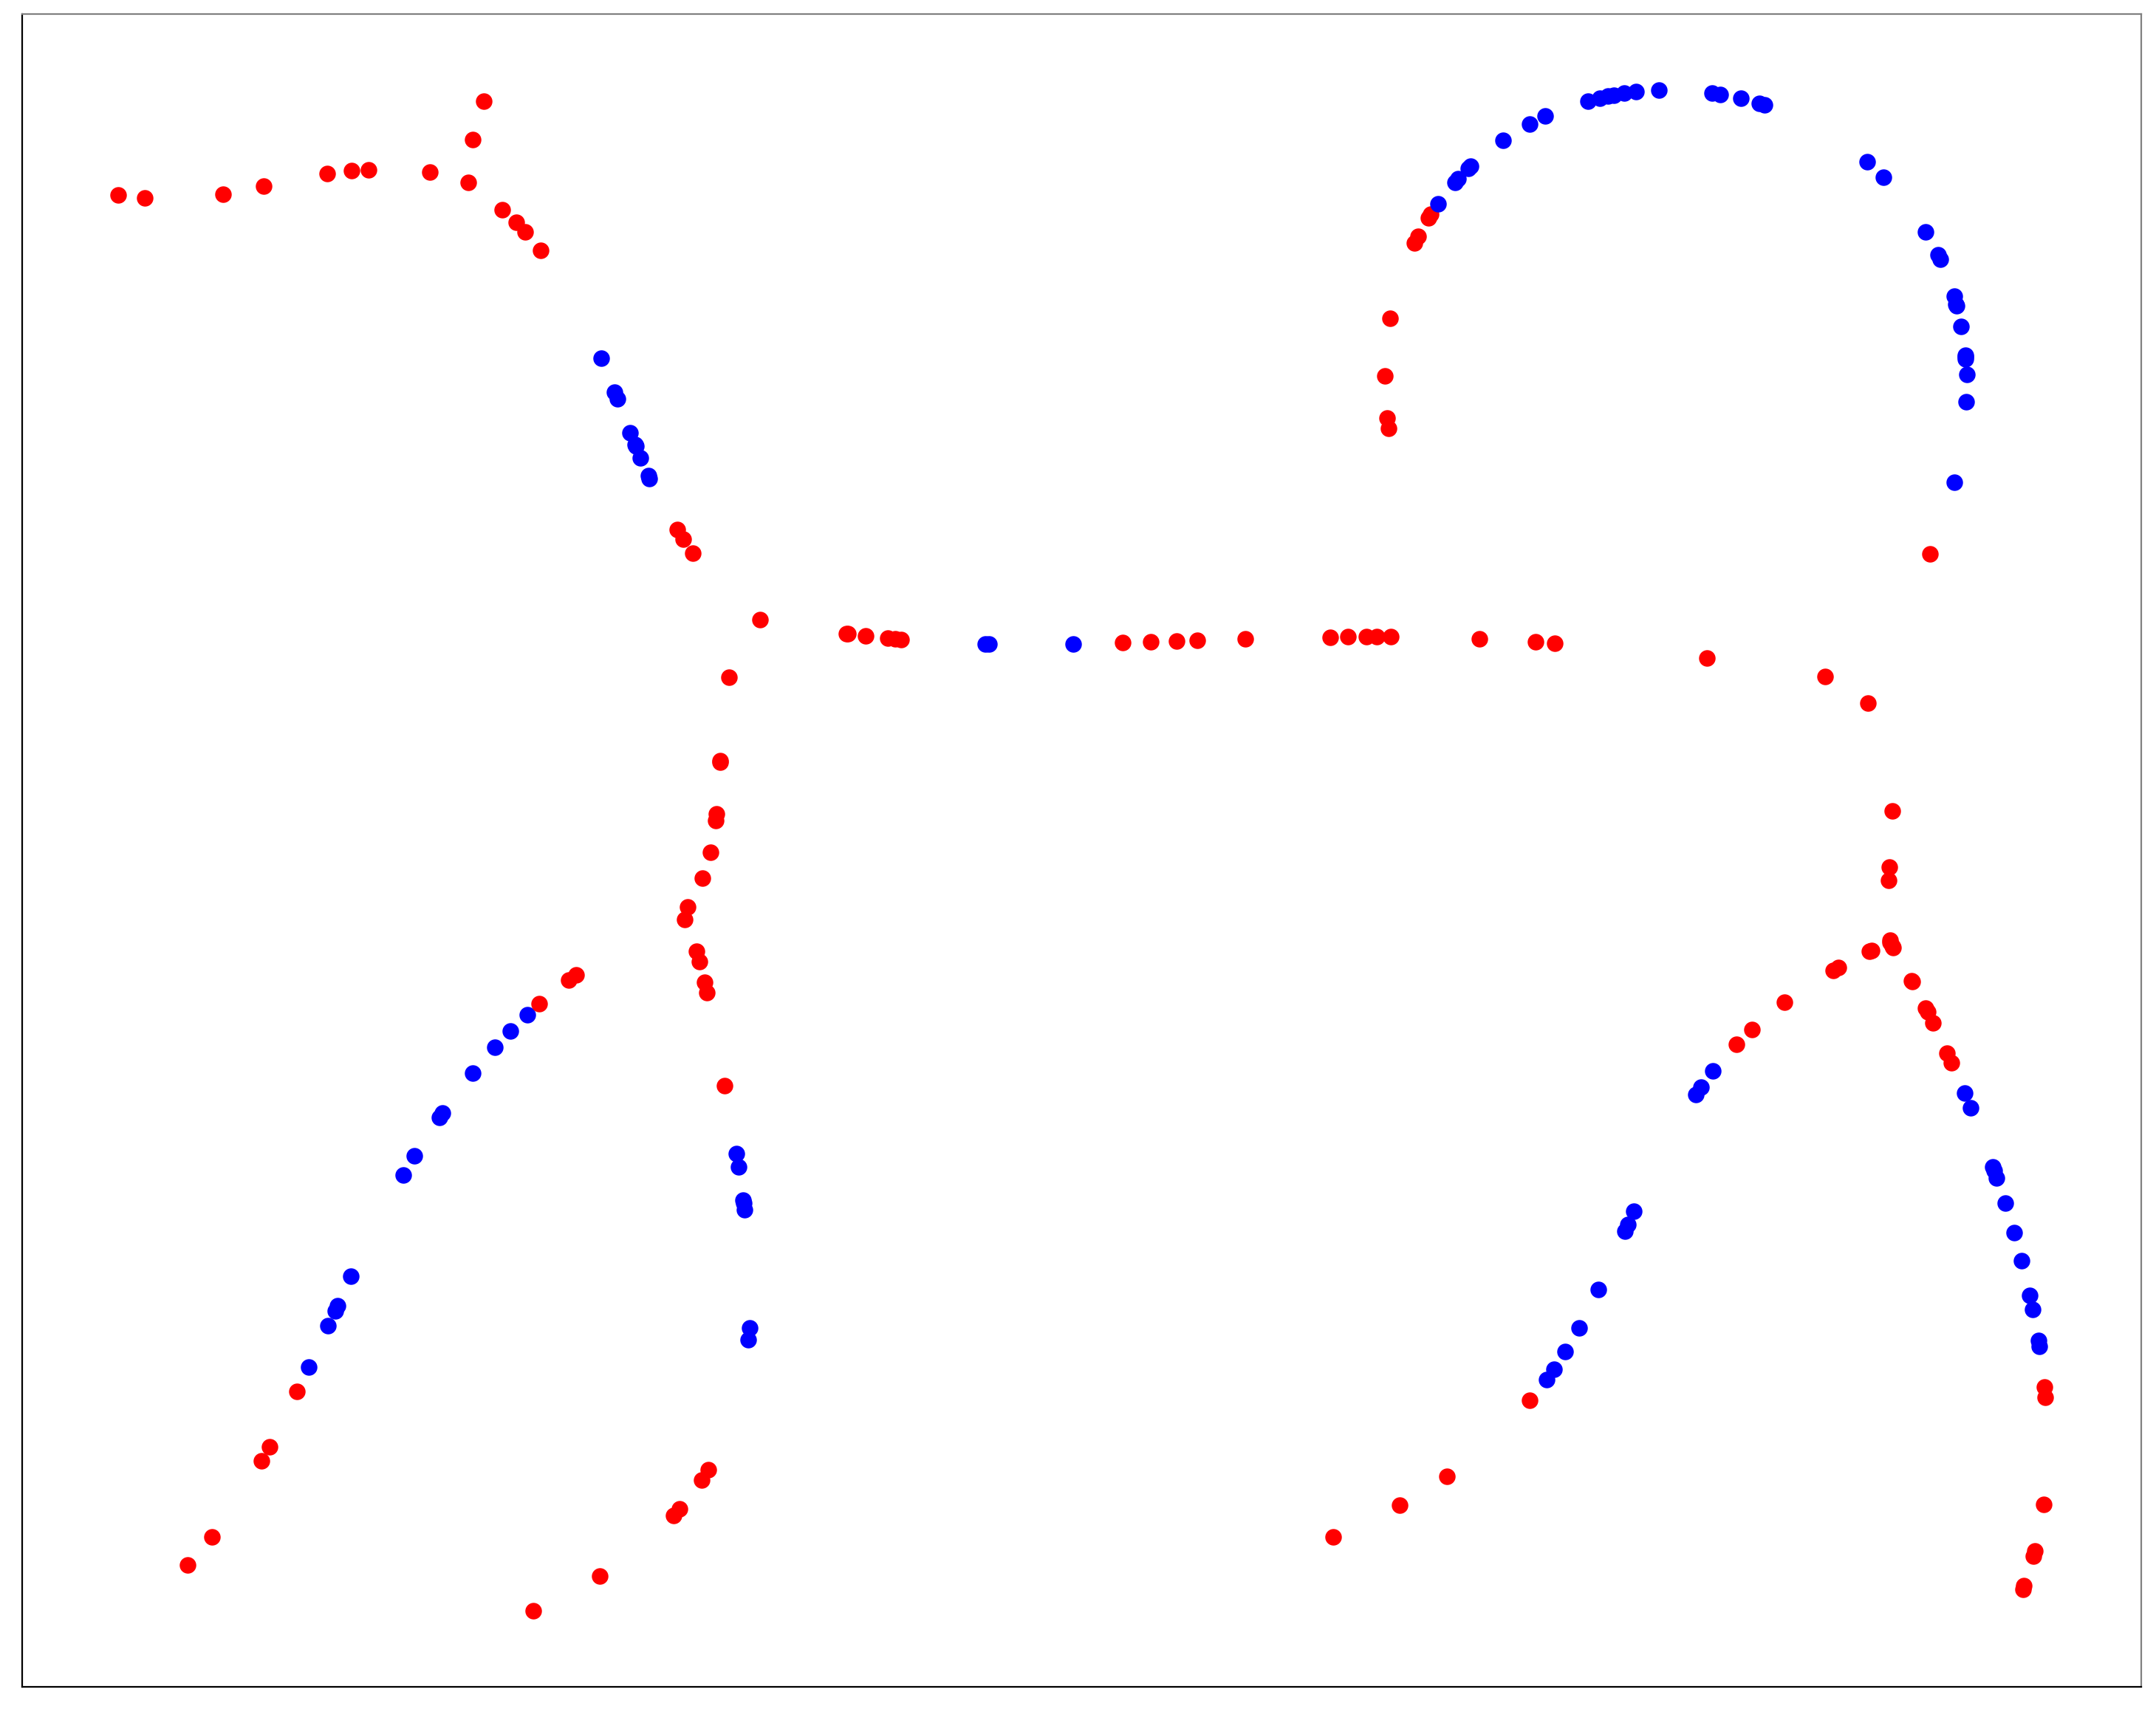

In [11]:
p11 = 1

# relabel all the points withing distance p11 from preliminary vertex
# points as vertices
for y in point_cloud.vertex_points:
    ball_points = get_ball_points(point_cloud.edge_points, y, p11)
    for ball_point in ball_points:
        ball_point.label = 'V'
if show:
    # after expansion step
    space = Space(2)
    space.plot_points(point_cloud.points)

In [12]:
# compute the connected components of Rips-Vietoris graphs:
# R_delta(vertex_points), R_delta(edge_points)
rips_V = rips_vietoris_graph(delta, point_cloud.vertex_points)
rips_E = rips_vietoris_graph(delta, point_cloud.edge_points)

In [13]:
cmpts_V = rips_V.components
cmpts_E = rips_E.components

for i, cmpt_points in cmpts_V.items():
    cmpts_V[i] = PointCloud(cmpt_points)

for j, cmpt_points in cmpts_E.items():
    cmpts_E[j] = PointCloud(cmpt_points)

In [14]:
nodes_emb_G = []
for i, cmpt_V in cmpts_V.items():
    nodes_emb_G.append(cmpt_V.center)

In [15]:
n = len(nodes_emb_G)
edges_emb_G = []
for i in range(n):
    for j in range(i + 1, n):
        for cmpt_E in cmpts_E.values():
            if cmpts_V[i].distance(cmpt_E) < delta and \
               cmpts_V[j].distance(cmpt_E) < delta:
                edges_emb_G.append([nodes_emb_G[i], nodes_emb_G[j]])

In [16]:
emb_G = EmbeddedGraph(nodes_emb_G, edges_emb_G)

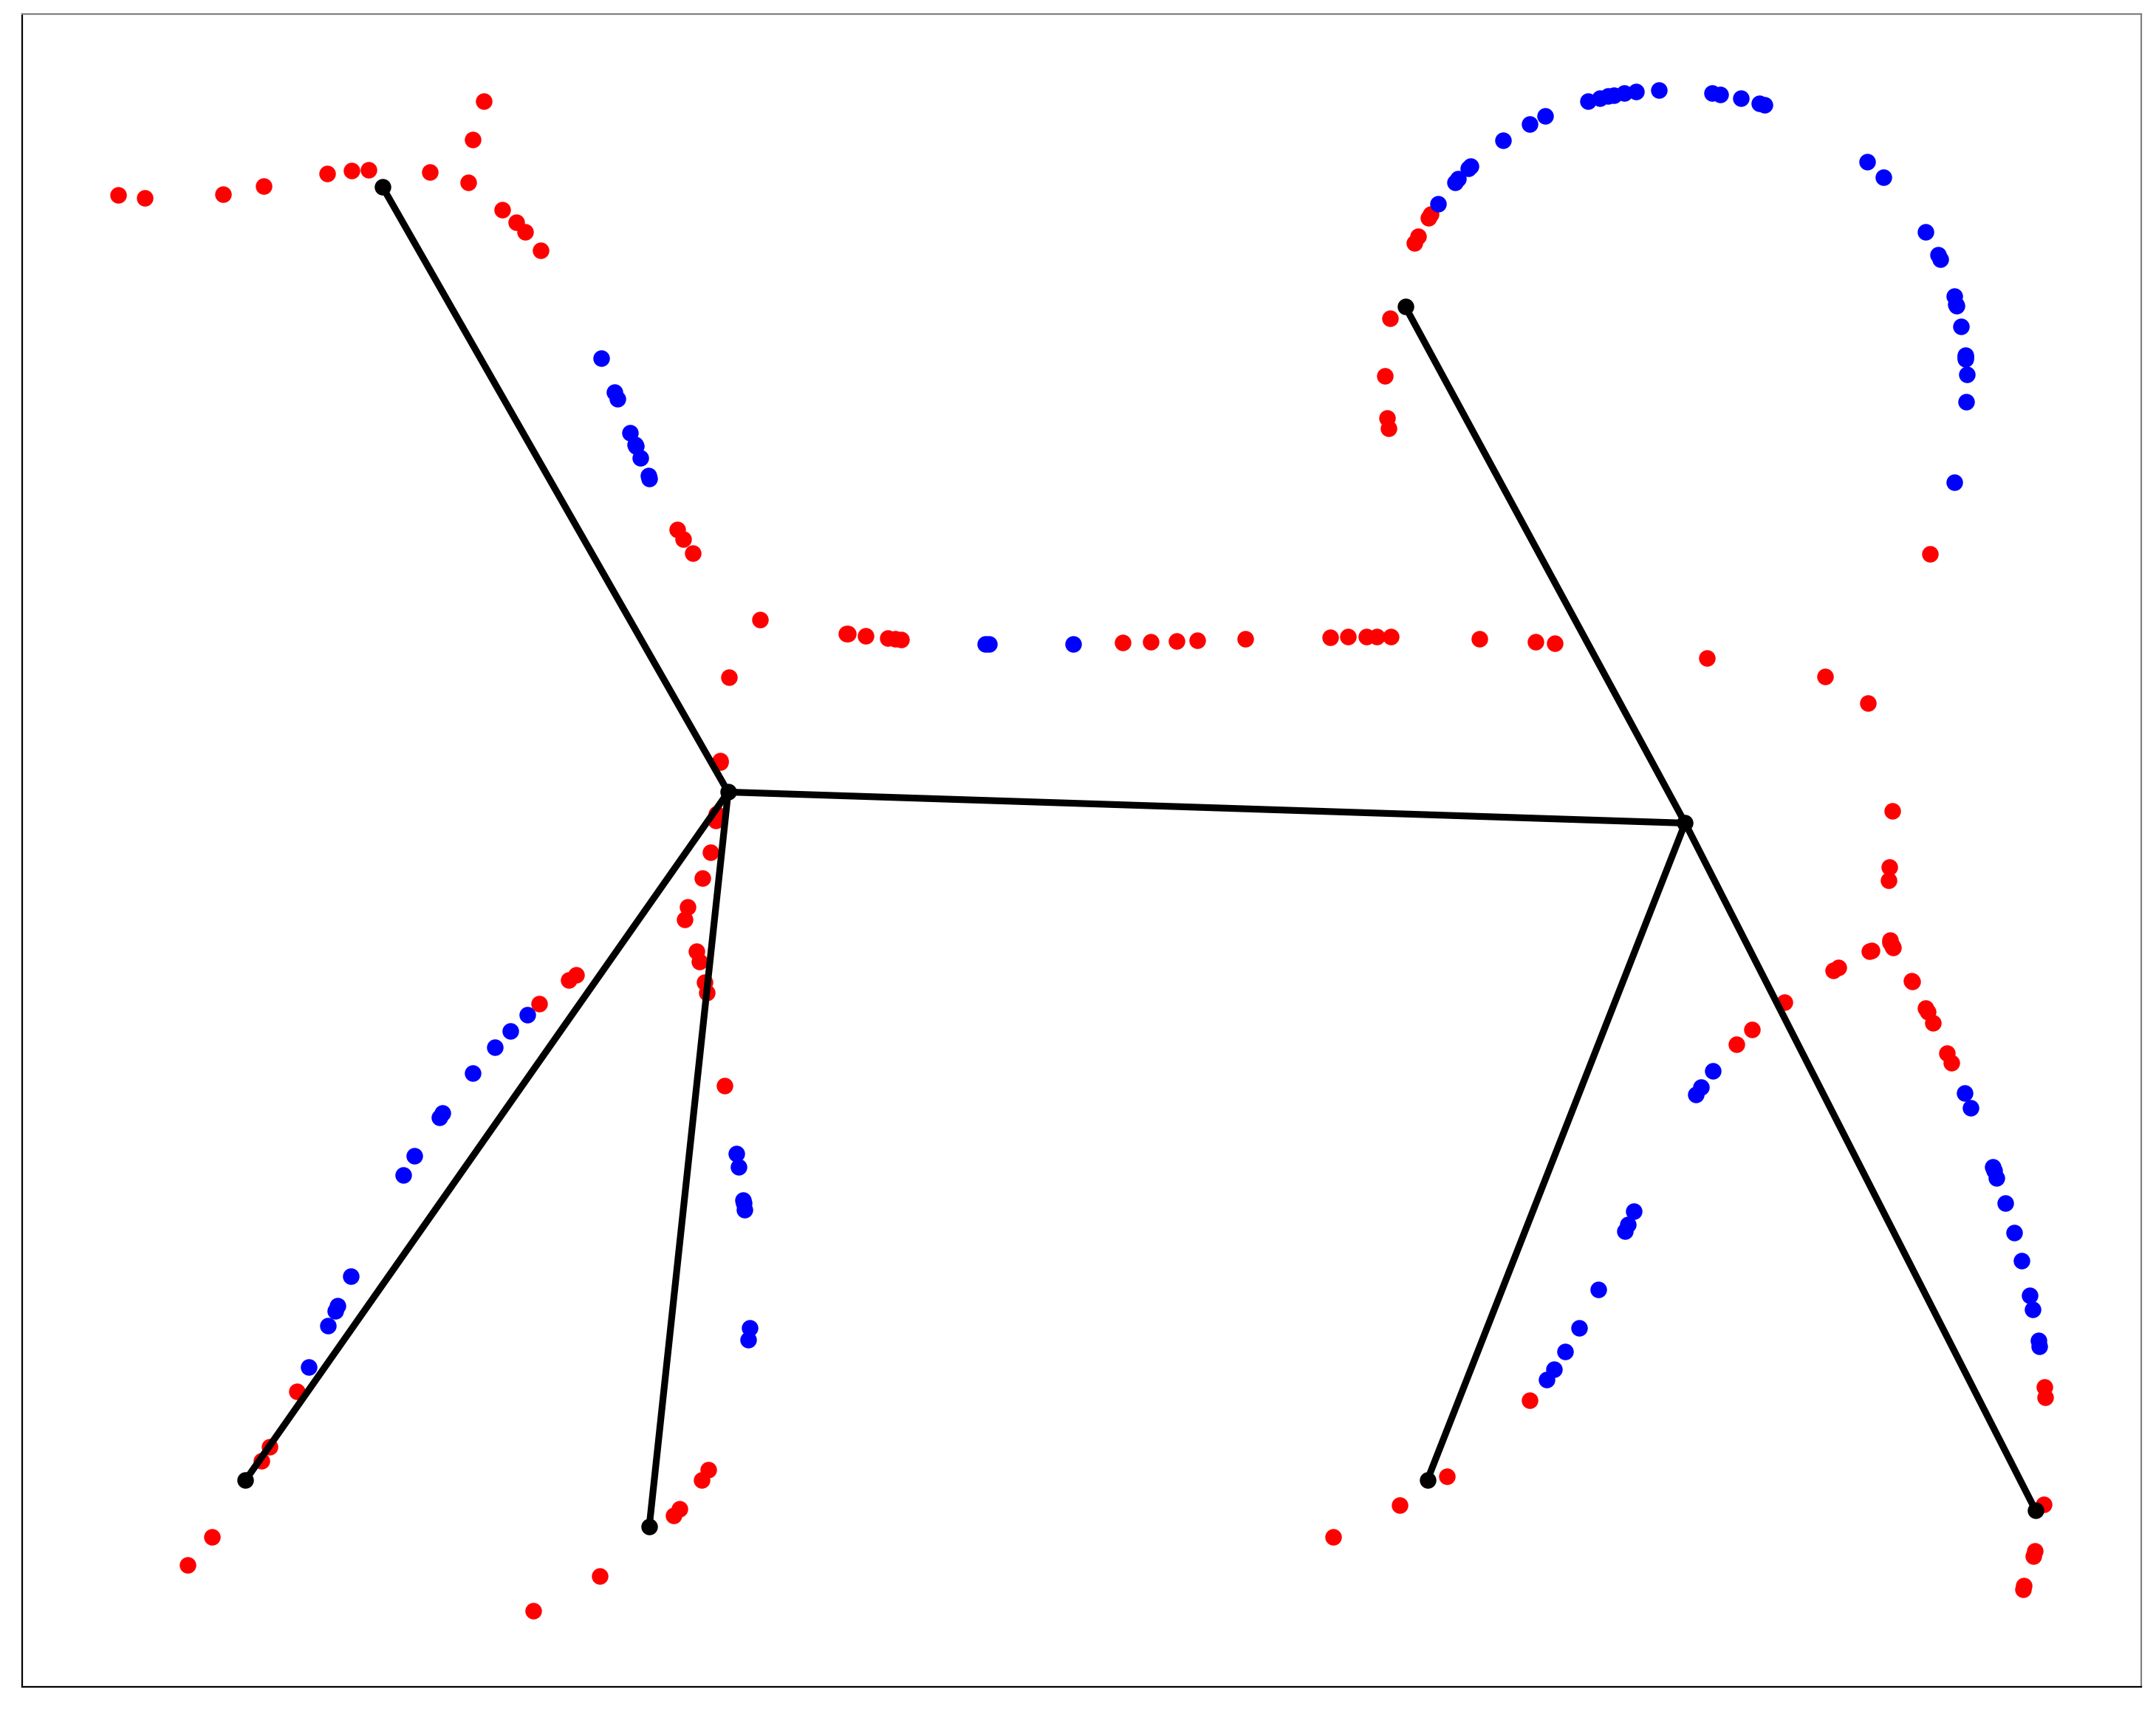

In [17]:
space = Space(2)
space.plot_points(point_cloud.points)
space.plot_embedded_graph(emb_G, color='black')

The ear and body parts are too short for the parameter values

In [18]:
lengths = {}
for part in parts.keys():
    ts = np.linspace(0, 1, 1000)
    xys = xy_points(ts, parts[part])
    s = 0
    for i in range(len(xys) - 1):
        s += np.linalg.norm(np.array(xys[i]) - np.array(xys[i+1]))
    lengths[part] = s
lengths

{'head': 2.1202958323758536,
 'ear': 0.6044005294504644,
 'neck': 3.196640564299123,
 'back': 6.476935614589219,
 'front': 1.83769895592779,
 'ass': 1.5713754187472435,
 'leg1': 5.097943905075918,
 'leg2': 4.778170367415574,
 'leg3': 4.999090908934341,
 'leg4': 4.380935731055426,
 'tail': 7.816509260561828}